In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()  #if you want to use seaborn themes with matplotlib functions
import warnings
warnings.filterwarnings('ignore')

In [3]:
rand_state = 1000

# Question 1: KNN Regression

In [4]:
df = pd.read_csv('bikeshare.csv')

df = pd.get_dummies(df, columns=['season', 'weathersit'])

df.head()

,yr,mnth,hr,holiday,weekday,notbizday,temp,hum,windspeed,dteday,cnt,season_1,season_2,season_3,season_4,weathersit_1,weathersit_2,weathersit_3,weathersit_4
0,0,1,0,0,6,1,-1.334609,0.947345,-1.553844,2011-01-01,16,1,0,0,0,1,0,0,0
1,0,1,1,0,6,1,-1.438475,0.895513,-1.553844,2011-01-01,40,1,0,0,0,1,0,0,0
2,0,1,2,0,6,1,-1.438475,0.895513,-1.553844,2011-01-01,32,1,0,0,0,1,0,0,0
3,0,1,3,0,6,1,-1.334609,0.636351,-1.553844,2011-01-01,13,1,0,0,0,1,0,0,0
4,0,1,4,0,6,1,-1.334609,0.636351,-1.553844,2011-01-01,1,1,0,0,0,1,0,0,0


### 1. Drop the dteday variable and then define your feature space and the target variable

In [31]:
df.drop(columns={'dteday'}, inplace=True)

y = df['cnt']
X = df.drop('cnt', axis=1) # becareful inplace= False

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rand_state)

### 2. From sklearn.neighbors import the relevant function for KNN regression. Do the following:

In [29]:
from sklearn.neighbors import KNeighborsRegressor

In [34]:
# Fitting KNN regression to the Training set

KNN_regression = KNeighborsRegressor(n_neighbors=5)
KNN_regression.fit(X_train, y_train)

KNeighborsRegressor()

In [35]:
# Predicting the Test set results
y_hat = KNN_regression.predict(X_test)

In [36]:
predictions = pd.DataFrame({ 'y_test':y_test,'y_hat':y_hat})
predictions.head()

,y_test,y_hat
4495,26,37.8
4418,47,58.6
7141,11,11.8
14765,205,217.6
16541,65,55.8


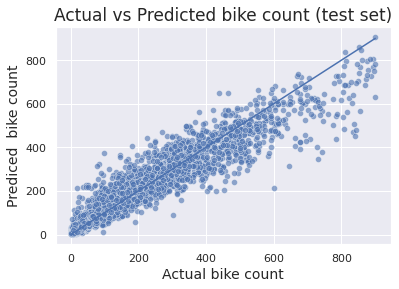

In [39]:
sns.scatterplot(x=y_test, y=y_hat, alpha=0.6)
sns.lineplot(y_test, y_test)

plt.xlabel('Actual bike count', fontsize=14)
plt.ylabel('Prediced  bike count', fontsize=14)
plt.title('Actual vs Predicted bike count (test set)', fontsize=17)
plt.show()

In [41]:
KNN_regression.score(X_train, y_train)

0.9274017260753645

In [42]:
KNN_regression.score(X_test, y_test)

0.8920975272678844

### 3. Cross validation

In [44]:
from sklearn.model_selection import cross_val_score

In [45]:
NMSE = cross_val_score(estimator = KNN_regression, X = X_train, y = y_train, cv = 5 , scoring="neg_mean_squared_error" )

In [50]:
MSE_CV = round(np.mean(-NMSE),4)
MSE_CV

4007.1628

In [51]:
RMSE_CV = round(np.sqrt(MSE_CV), 4)
RMSE_CV

63.3022

In [52]:
RMSE_CV=[]
RMSE_test = []

k=40

for i in range(1,k):
    KNN_i = KNeighborsRegressor(n_neighbors=i)
    KNN_i.fit(X_train, y_train)
    RMSE_i = np.sqrt(np.mean(-1*cross_val_score(estimator = KNN_i, X = X_train, y = y_train, cv = 10 , scoring="neg_mean_squared_error" )))
    RMSE_CV.append(RMSE_i)
    
    RMSE_test.append(np.sqrt(np.mean(np.square(y_test - KNN_i.predict(X_test)))))
    
optimal_k = pd.DataFrame({'RMSE_CV': np.round(RMSE_CV,2), 'RMSE_test':np.round(RMSE_test,2), 'K':range(1,k)})

In [57]:
optimal_k.head()

,RMSE_CV,RMSE_test,K
0,88.72,85.25,1
1,68.71,67.22,2
2,63.27,61.97,3
3,62.02,60.66,4
4,61.78,60.81,5


In [53]:
np.argmin(optimal_k['RMSE_CV'])

4

In [54]:
optimal_k.loc[np.argmin(optimal_k['RMSE_CV']), 'K']

5

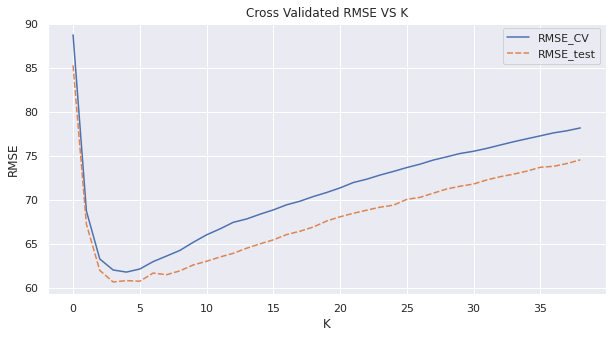

In [55]:
plt.figure(figsize=(10,5))
sns.lineplot(data=optimal_k.drop('K', axis=1))
plt.title('Cross Validated RMSE VS K')
plt.xlabel('K')
plt.ylabel('RMSE')
plt.show()

### Report the R-squared in the test set with the optimal k for KNN. Compare this number with R-squared in the test set using multiple regression model.

In [61]:
print(optimal_k.loc[optimal_k['K'] == 5])

   RMSE_CV  RMSE_test  K
4    61.78      60.81  5


# Question 2: KNN Classification

### 1. Define a binary target variable overload

In [70]:
conditions = [
    df['cnt'] > 500,
    True
]

values = [1,0]

df['Overload'] = np.select(conditions, values)

df.Overload.value_counts()

0    16100
1     1279
Name: Overload, dtype: int64

There data here is largely made up of values that are not overloaded, with a raito of around 16-1. In this sense, the data is very imbalanced.

In [71]:
df.head()

,yr,mnth,hr,holiday,weekday,notbizday,temp,hum,windspeed,cnt,season_1,season_2,season_3,season_4,weathersit_1,weathersit_2,weathersit_3,weathersit_4,Overload
0,0,1,0,0,6,1,-1.334609,0.947345,-1.553844,16,1,0,0,0,1,0,0,0,0
1,0,1,1,0,6,1,-1.438475,0.895513,-1.553844,40,1,0,0,0,1,0,0,0,0
2,0,1,2,0,6,1,-1.438475,0.895513,-1.553844,32,1,0,0,0,1,0,0,0,0
3,0,1,3,0,6,1,-1.334609,0.636351,-1.553844,13,1,0,0,0,1,0,0,0,0
4,0,1,4,0,6,1,-1.334609,0.636351,-1.553844,1,1,0,0,0,1,0,0,0,0


### 2. Along with the target variable, define your feature space (X) and split the data into test (30%) and train set

In [80]:
y = df['Overload']
X = df.drop('Overload', axis=1) # becareful inplace= False

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=rand_state)

### 3. From sklearn.neighbors import the relevant function for KNN classification. Do the followings:

In [81]:
from sklearn.neighbors import KNeighborsClassifier

In [82]:
# Fitting KNN classifier to the Training set

KNN_classifier = KNeighborsClassifier(n_neighbors=20)
KNN_classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=20)

In [83]:
# Predicting the Test set probabilities and classes
y_hat      = KNN_classifier.predict(X_test)
y_hat_probs = KNN_classifier.predict_proba(X_test)[:,1] 
# predicted probabilities are reported for both classes. we saved the prob of purchased!

In [84]:
np.round(KNN_classifier.predict_proba(X_test),3)[:5]

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [85]:
np.max(y_hat_probs)

1.0

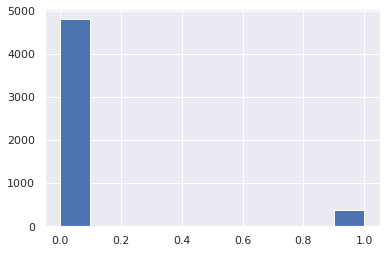

In [87]:
plt.hist(y_hat_probs)
plt.show()

In [89]:
y_hat_30 = np.where(y_hat_probs>0.3,1,0)
y_hat_70 = np.where(y_hat_probs>0.7,1,0)

In [98]:
# let's put all the predictions together in a data frame.
df_predictions = pd.DataFrame({'y_test':y_test, 'y_hat_probs':y_hat_probs,
                               'y_hat_30':y_hat_30, 'y_hat_70':y_hat_70})
df_predictions.head()

,y_test,y_hat_probs,y_hat_30,y_hat_70
4495,0,0.0,0,0
4418,0,0.0,0,0
7141,0,0.0,0,0
14765,0,0.0,0,0
16541,0,0.0,0,0


### 4. Borrow my_KNN_report() function from the python notebook of class 13

In [99]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, matthews_corrcoef



def my_KNN_report(X_train, y_train, X_test,y_test, K=5, threshold=0.5, weights='uniform'):
    knn= KNeighborsClassifier(n_neighbors=K, weights=weights)
    knn.fit(X_train, y_train)
    probs = knn.predict_proba(X_test)[:,1]
    y_hat = np.where(probs>=threshold,1,0)
    
    cm = confusion_matrix(y_test, y_hat)
    accuracy = round(accuracy_score(y_test,y_hat) ,4)
    error_rate = round(1-accuracy,4)
    precision = round(precision_score(y_test,y_hat),2)
    recall = round(recall_score(y_test,y_hat),2)
    f1score = round(f1_score(y_test,y_hat),2)
    MCC = round(matthews_corrcoef(y_test,y_hat),2)
    cm_labled = pd.DataFrame(cm, index=['Actual : negative ','Actual : positive'], columns=['Predict : negative','Predict :positive '])
    
    print("-----------------------------------------")
    print('Accuracy  = {}'.format(accuracy))
    print('Error_rate  = {}'.format(error_rate))
    print('Precision = {}'.format(precision))
    print('Recall    = {}'.format(recall))
    print('f1_score  = {}'.format(f1score))
    print('MCC       = {}'.format(MCC))
    print("-----------------------------------------")
    return cm_labled
 

In [101]:
my_KNN_report(X_train, y_train, X_test,y_test, K=3, threshold=0.5, weights='uniform')

-----------------------------------------
Accuracy  = 0.9996
Error_rate  = 0.0004
Precision = 1.0
Recall    = 1.0
f1_score  = 1.0
MCC       = 1.0
-----------------------------------------


,Predict : negative,Predict :positive
Actual : negative,4818,1
Actual : positive,1,394


In [103]:
my_KNN_report(X_train, y_train, X_test,y_test, K=3, threshold=0.3, weights='uniform')

-----------------------------------------
Accuracy  = 0.999
Error_rate  = 0.001
Precision = 0.99
Recall    = 1.0
f1_score  = 0.99
MCC       = 0.99
-----------------------------------------


,Predict : negative,Predict :positive
Actual : negative,4814,5
Actual : positive,0,395


### 5. Plot the ROC curve and report the AUC score

In [105]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score

No Skill: ROC AUC=0.500
KNN: ROC AUC=1.000


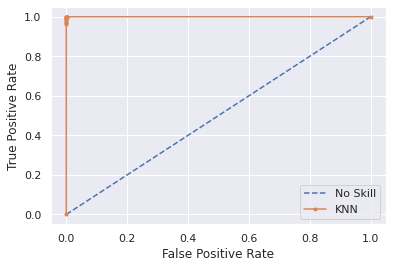

In [106]:
# generate a no skill (ns) prediction and KNN  (lr) predictions.
ns_probs = [0 for i in range(len(y_test))]
lr_probs = KNN_classifier.predict_proba(X_test)[:,1]
# calculating scores for no skill and KNN 
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('KNN: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='KNN')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

### 6. Cross validation

In [108]:
from sklearn.model_selection import cross_val_score
import sklearn.metrics

In [109]:
accuracy = cross_val_score(estimator = KNN_classifier, X = X_train, y = y_train, cv = 5 , scoring="accuracy" )

In [110]:
1-accuracy

array([0.        , 0.        , 0.00041102, 0.00123305, 0.        ])

In [111]:
error_rate=round((1-accuracy).mean(),4)
error_rate

0.0003

In [114]:
error_rate_test = []
error_rate_CV=[]
k=50

for i in range(1,k):
    KNN_i = KNeighborsClassifier(n_neighbors=i)
    KNN_i.fit(X_train, y_train)
    accuracy =  cross_val_score(estimator = KNN_i, X = X_train, y = y_train, cv = 5 , scoring="accuracy")
    error_rate_CV.append(np.mean(1-accuracy))
    error_rate_test.append(np.mean(y_test != KNN_i.predict(X_test)) )
    
optimal_k = pd.DataFrame({'error_rate_CV': error_rate_CV, 'error_rate_test':error_rate_test}, index=range(1,k))

In [128]:
optimal_k.head(15)

,error_rate_CV,error_rate_test
1,0.000575,0.000575
2,0.000986,0.000767
3,0.000658,0.000384
4,0.000904,0.000575
5,0.000493,0.000000
6,0.000658,0.000192
7,0.000575,0.000192
8,0.000658,0.000192
9,0.000411,0.000384
10,0.000658,0.000192


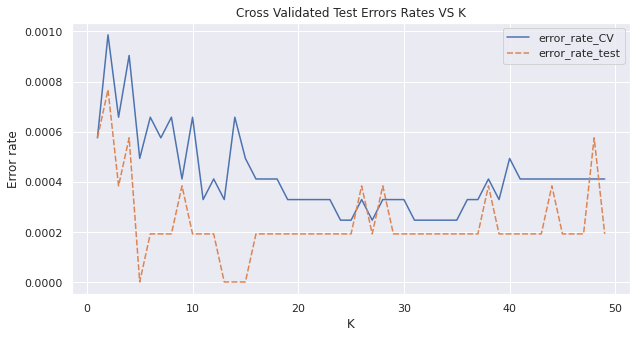

In [115]:
plt.figure(figsize=(10,5))
sns.lineplot(data=optimal_k)
plt.title('Cross Validated Test Errors Rates VS K')
plt.xlabel('K')
plt.ylabel('Error rate')
plt.show()

In [126]:
lowestError = optimal_k['error_rate_CV'].min()

print("\nOptimal value: ")
print(optimal_k.loc[optimal_k['error_rate_CV'] == lowestError])

my_KNN_report(X_train, y_train, X_test,y_test, K=27, threshold=0.5)


Optimal value: 
    error_rate_CV  error_rate_test
27       0.000247         0.000192
-----------------------------------------
Accuracy  = 0.9998
Error_rate  = 0.0002
Precision = 1.0
Recall    = 1.0
f1_score  = 1.0
MCC       = 1.0
-----------------------------------------


,Predict : negative,Predict :positive
Actual : negative,4819,0
Actual : positive,1,394


### 7. Which of the following probability thresholds would satisfy your objective?